In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sep
import math
import fitsio

In [2]:
from astropy.utils.data import download_file
from astropy.io import fits
from matplotlib import rcParams

In [3]:
%matplotlib inline
rcParams['figure.figsize']=[9.,9.]

In [4]:
from astropy.utils.data import download_file
from astropy.io import fits
def get_data(filename):
    file = filename
    image_file = download_file(file)
    data = fits.getdata(image_file)
    data = data.byteswap().newbyteorder()
    return data

In [5]:
def subtract_background(data):
    bkg = sep.Background(data)
    bkg_image = bkg.back()
    bkg_rms = bkg.rms()
    data_sub = data - bkg
    return data_sub, bkg

In [6]:
data = fitsio.read('frame-u-006122-1-0013.fits')

In [7]:
data

array([[-0.00439453, -0.02294922, -0.03222656, ..., -0.01235962,
        -0.02151489,  0.05181885],
       [ 0.00489044,  0.00488281, -0.00439453, ...,  0.01515198,
        -0.01235962,  0.05181885],
       [ 0.02346802,  0.03271484, -0.04150391, ...,  0.04266357,
        -0.03070068, -0.03070068],
       ...,
       [ 0.0055542 ,  0.01483154,  0.02410889, ..., -0.01173401,
        -0.05755615, -0.03005981],
       [ 0.0241394 , -0.01300049, -0.04083252, ...,  0.07995605,
         0.00660706, -0.04840088],
       [-0.02230835, -0.05010986, -0.05938721, ...,  0.01577759,
         0.0524292 ,  0.01577759]], dtype=float32)

In [8]:
len(data[0])

2048

In [9]:
len(data)

1489

In [10]:
data1 = fits.open('frame-u-006122-1-0013.fits')

In [11]:
data1.info()

Filename: frame-u-006122-1-0013.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      96   (2048, 1489)   float32   
  1                1 ImageHDU         6   (2048,)   float32   
  2                1 BinTableHDU     27   1R x 3C   [49152E, 2048E, 1489E]   
  3                1 BinTableHDU     79   1R x 31C   [J, 3A, J, A, D, D, 2J, J, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, E, E]   


In [12]:
#data1[0].header

In [13]:
data1[1].header

XTENSION= 'IMAGE   '           /Image Extension created by MWRFITS v1.11        
BITPIX  =                  -32 /                                                
NAXIS   =                    1 /                                                
NAXIS1  =                 2048 /                                                
PCOUNT  =                    0 /                                                
GCOUNT  =                    1 /                                                

In [14]:
data1[1].data

array([0.00928506, 0.00927875, 0.00927719, ..., 0.00916764, 0.00916754,
       0.00916742], dtype=float32)

In [15]:
len(data1[1].data)

2048

In [16]:
data_sub, bkg = subtract_background(data)
bkg_image = bkg.back()

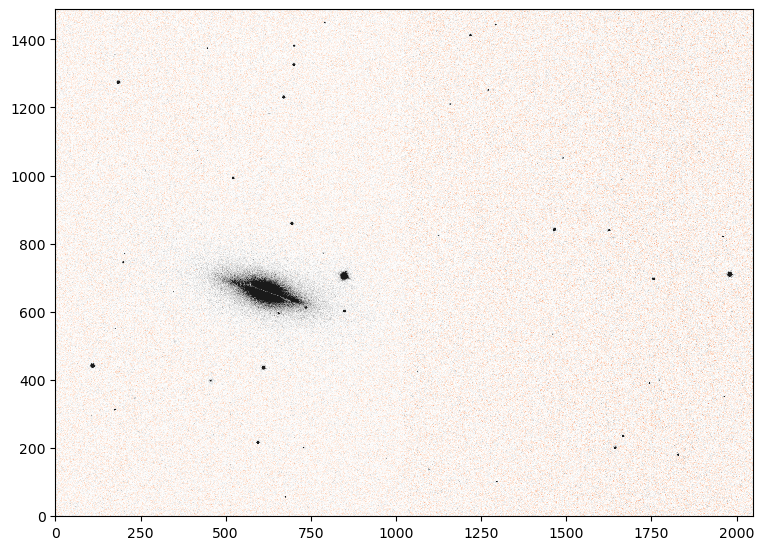

In [17]:
m1, s1 = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='RdGy',vmin=m1-s1, vmax=m1+s1, origin='lower')

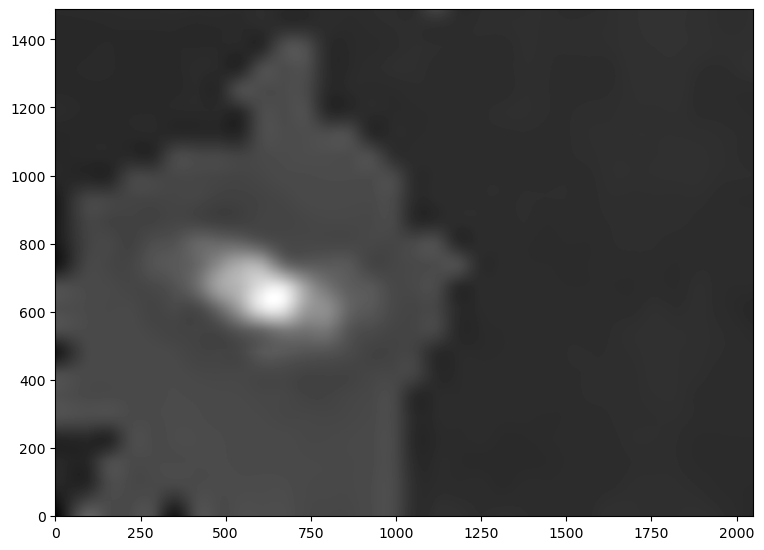

In [18]:
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')

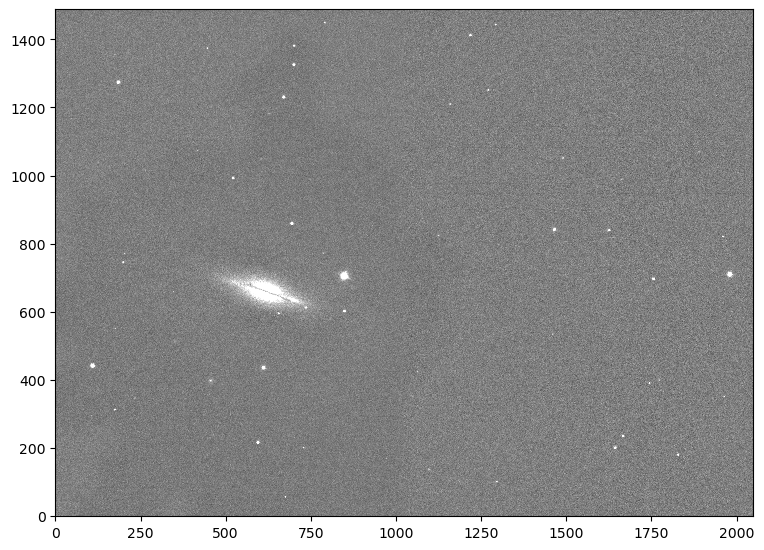

In [51]:
m2, s2 = np.mean(data_sub), np.std(data_sub)
plt.imshow(data_sub, interpolation='nearest', cmap='gray',vmin=m2-s2, vmax=m2+s2, origin='lower')

In [20]:
#Source Detection
from matplotlib.patches import Ellipse

objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

#sep.extract returns a numpy array called Objects which has 30 data types


In [21]:
objects.dtype.names

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

In [22]:
print((objects['flux']))
print(len(objects['flux']))

[3.40845895e+00 8.81644344e+00 1.22643244e+00 4.94853675e-01
 6.51145041e-01 9.40634537e+00 7.68588960e-01 5.40374160e-01
 1.08799160e+00 9.16043937e-01 1.00493050e+01 1.11934817e+00
 4.45627022e+01 7.50412405e-01 6.33776760e+00 8.33466034e+01
 7.90010929e-01 1.68897537e+02 3.21058960e+01 6.26049995e-01
 5.80442548e-01 2.29075956e+00 1.97777605e+00 9.79131520e-01
 1.21432567e+00 1.35970783e+01 4.48713869e-01 4.91127700e-01
 4.41235876e+00 3.46785069e+00 6.42901611e+00 7.86722124e-01
 1.67482567e+01 6.29827595e+00 2.43138981e+01 6.50815308e-01
 7.51325071e-01 4.53188717e-01 4.05081320e+00 5.72595337e+02
 6.00469112e-01 6.70353088e+02 4.49375004e-01 5.33509076e-01
 7.74651647e-01 1.83728755e+00 3.21353054e+00 6.30414009e-01
 7.12426376e+00 2.92883539e+00 5.79953432e-01 1.69791794e+00
 2.86063862e+01 6.39479280e-01 7.17948608e+01 3.83833337e+00
 6.45413756e-01 4.34177101e-01 3.22267222e+00 3.82132679e-01
 5.10997772e-01 4.19614017e-01 8.38849411e+01 2.87356901e+00
 1.18116345e+03 3.429959

In [24]:
maximum=max(objects['flux'])
print(maximum)

4168.97216796875


In [25]:
galaxy = 3.19377588e+03

In [28]:
print(objects['x'])

[1974.30914237  675.48856945 1360.27790081 1735.33187354 1774.69352665
 1296.07740723  116.12845287 1198.40961484 1629.00120208 1882.98994025
 1097.0076452   971.8981024  1828.13366632 1425.56556182  729.58783193
 1643.24177123  135.020042    595.59253673 1666.58984005 1775.43960232
  682.12890437  107.9727232  1208.05164732  726.68006712 1328.61663824
  175.61790863 1609.79431169 1489.80900557  234.0907115  1049.46482194
 1962.76638117 1837.00680233 1744.02231863 1772.21840334  457.06712244
 1197.99500127 1269.25368577 1298.40225151 1062.88972199  610.99576002
 1971.75344223  109.65236969 1913.40216128  724.61725282 1880.60824581
  881.02637958  354.46330164 1268.9241514  1460.04310604  176.71478727
 1984.51045811 2035.75891814  655.67192268 1523.78712858  849.0293906
  770.55101393 1193.51620826 1361.19696704  744.21275828 1248.60450815
 1774.79751497 1712.77904812 1755.49148597 1495.50692054 1979.24695345
  696.07276078  625.07915726  610.23715261  848.51736728  199.88528248
 1844.2

In [30]:
print(objects['y'])

[  43.13237509   55.6123751    77.7801921    82.82452003   87.12867615
  100.63959748  103.77098538  109.43427211  115.4861895   127.95842805
  136.24816704  168.30003999  179.32318284  195.75019147  199.63383803
  199.48284544  207.96533887  215.09181339  234.35537441  246.98039689
  289.00720949  293.21781744  294.50130979  301.80384571  306.06926425
  312.17428198  332.57022354  338.39968216  345.38525812  349.62867853
  350.15145476  374.49612951  388.95729101  398.44229114  396.62650788
  408.99893277  414.72808568  415.39400719  424.03963159  433.90744841
  446.62106636  439.75538164  483.17876854  495.18932363  501.86736325
  511.72231679  512.71274932  524.87718605  532.15846349  549.43061647
  552.998844    576.57744879  593.56810278  603.35502952  600.17720607
  603.28323245  610.02299219  630.39901081  648.86498651  680.19333988
  680.35730109  698.4112821   695.2431802   707.56179446  707.3120196
  634.58538481  667.84034521  647.99255366  702.84163386  743.3682505
  756.56

In [31]:
print(objects['x2'])
print(max(objects['x2']))

[2.13119824e+00 1.65057950e+00 1.72937672e+00 2.21733492e-01
 2.12547435e-01 1.99958079e+00 1.33550497e+00 2.41830524e-01
 5.73103518e-01 6.06406349e-01 3.76040281e+00 5.08876290e-01
 3.01135387e+00 2.45701648e-01 1.61886381e+00 2.94685469e+00
 5.31264424e-01 2.92943325e+00 2.50418163e+00 2.46352120e-01
 4.70827435e-01 1.09755769e+00 1.12454191e+00 7.79603727e-01
 9.12267985e-01 1.96582868e+00 5.17922907e-01 5.26871836e-01
 1.48247297e+00 1.80308180e+00 3.03661942e+00 4.96114502e-01
 2.43159025e+00 1.68366038e+00 8.33477052e+00 5.24540341e-01
 8.46701101e-01 1.04172468e+00 1.35626234e+00 3.64929397e+00
 5.18081888e-01 3.59338484e+00 2.40427585e-01 1.06725811e+00
 7.60757760e-01 1.17044200e+00 3.64574747e+00 6.76777880e-01
 1.96683876e+00 1.23831829e+00 2.49890628e-01 1.11647477e+00
 3.10714356e+00 4.39363236e-01 2.95543479e+00 4.99232772e+00
 2.49737292e-01 5.42307768e-01 3.14667535e+00 2.39078047e-01
 5.22027817e-01 5.39903218e-01 2.85111313e+00 3.86960523e+00
 4.15500265e+00 2.814497

In [32]:
print(objects['y2'])
print(max(objects['y2']))

[1.60808976e+00 1.58091916e+00 8.23701364e-01 1.13577572e+00
 1.12816702e+00 1.69443470e+00 3.73710383e-01 1.07556210e+00
 8.97793513e-01 6.06365550e-01 3.65558560e+00 7.75941865e-01
 2.90952276e+00 4.70093973e-01 1.46773963e+00 2.88890521e+00
 4.47624011e-01 2.72368734e+00 2.31888968e+00 6.21564662e-01
 6.51347262e-01 8.10640131e-01 8.84745234e-01 5.88601352e-01
 5.91523298e-01 1.69541348e+00 2.45068654e-01 2.39936330e-01
 1.25732821e+00 1.63289039e+00 1.58209364e+00 6.62493771e-01
 2.11491766e+00 1.83478239e+00 7.50329542e+00 5.67909161e-01
 4.08598305e-01 2.38765525e-01 1.50840924e+00 3.34315095e+00
 2.35342937e-01 3.21665670e+00 5.07460477e-01 1.53480190e-01
 3.74158974e-01 1.15220130e+00 2.77712442e+00 1.09512409e+00
 2.09915548e+00 9.85404933e-01 6.29094603e-01 1.79466953e+00
 3.83226014e+00 5.05578428e-01 2.64185489e+00 4.57001294e+00
 6.01153397e-01 2.39801183e-01 4.11764719e+00 5.49606159e-01
 2.29637022e-01 2.42129135e-01 2.67551363e+00 1.80893036e+00
 4.04904726e+00 5.974365

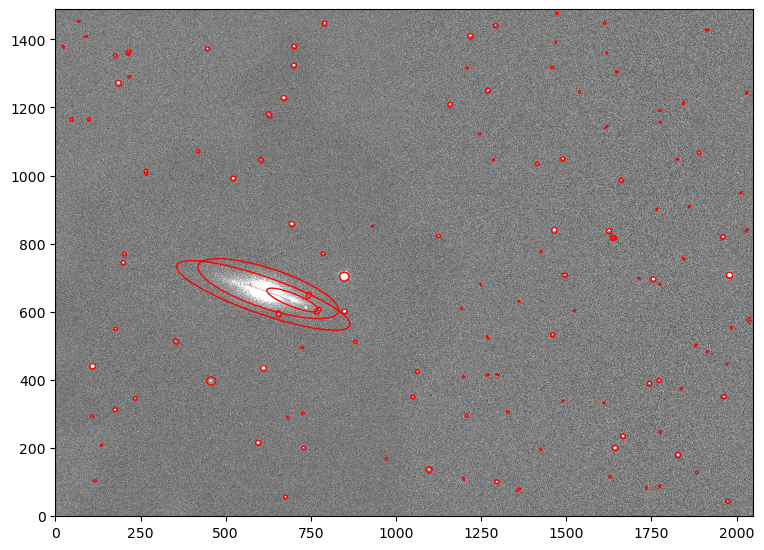

In [33]:
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')

for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]), width=9*objects['a'][i], height=9*objects['b'][i], 
                  angle = objects['theta'][i]*180.0/np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

In [34]:
def distance_modulus(m,M):
    return 10**( (m-M)/5 +1)
def app_mag(flux):
    return -2.5*math.log10(flux/(25.11*10**8))

In [36]:
def target_distance(target_flux):
    calib_flux = 0.7685889601707458
    calib_flux_app = app_mag(calib_flux)
    f_cal = calib_flux_app / calib_flux
    m_target = app_mag(target_flux)
    M_target = m_target/f_cal
    return (10**( (m_target-M_target)/5 +1))

In [47]:
def target_max(xmin, xmax, ymin, ymax):
    A=[]
    x_coordinate=[]
    y_coordinate=[]
    for i in range(len(objects['x'])):
        if (objects['x'][i]< xmax and objects['x'][i]>xmin and objects['y'][i]>ymin and objects['y'][i]<ymax):
            A.append(objects['flux'][i])
            x_coordinate.append(objects['x'][i])
            y_coordinate.append(objects['y'][i])
    for i in range (len(A)):
        if A[i]== max(A):
            index = i       
    maximum = max(A)
    return maximum, x_coordinate[index], y_coordinate[index]

In [37]:
print(target_distance(4168.97216796875))

6259.300242140447


In [39]:
m_target_app = app_mag(target_flux)
print(m_target_app)

14.449544292310254


In [48]:
target_max(750,1000,600,800)

(4168.97216796875, 848.5173672782347, 702.8416338647834)

In [52]:
target_max(500,750,600,800)

(3193.77587890625, 610.2371526110873, 647.9925536597518)

In [53]:
print(target_distance(4168.97216796875))

6259.300242140447


In [54]:
print(target_distance(3193.77587890625))

7120.628542307405


In [76]:
print(target_distance(4168.97216796875))

6259.300242140447


In [77]:
print(target_distance(3193.77587890625))

7120.628542307405


In [78]:
calib_flux = 0.7685889601707458
calib_flux_app = app_mag(calib_flux)
f_cal = calib_flux_app / calib_flux

In [79]:
print(calib_flux_app)

23.785381426606417


In [80]:
print(f_cal)

30.946816385864267


In [88]:
m_target = app_mag(4168.97216796875)
M_target = m_target/f_cal

In [89]:
print(m_target)

14.449544292310254


In [90]:
print(M_target)

0.4669153722355248


In [92]:
print(10**( (m_target-M_target)/5 +1))

6259.300242140447


In [93]:
m_target = app_mag(3193.77587890625)
M_target = m_target/f_cal

In [94]:
print(10**( (m_target-M_target)/5 +1))

7120.628542307405


In [85]:
print(m_target)

14.738855690417513


In [86]:
print(M_target)

0.47626403655368743
